In [121]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [122]:
file_path = Path('Resources/crypto_data.csv')
df = pd.read_csv(file_path)
df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [123]:
df['IsTrading'].unique()

array([ True, False])

In [124]:
#locate all coins not trading and drop them
not_trading = df[~df['IsTrading']]
not_trading.count()


Unnamed: 0         108
CoinName           108
Algorithm          108
IsTrading          108
ProofType          108
TotalCoinsMined     59
TotalCoinSupply    108
dtype: int64

In [125]:
#filter for coins not being traded 
crypto = df[df['IsTrading'] == True]
crypto

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [127]:
crypto.describe()

,TotalCoinsMined
count,6.850000e+02
mean,4.138985e+09
std,4.028093e+10
min,-5.917978e+09
25%,6.194780e+05
50%,1.374274e+07
75%,1.000000e+08
max,9.899887e+11


In [128]:
crypto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1144 entries, 0 to 1247
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1144 non-null   object 
 1   CoinName         1144 non-null   object 
 2   Algorithm        1144 non-null   object 
 3   IsTrading        1144 non-null   bool   
 4   ProofType        1144 non-null   object 
 5   TotalCoinsMined  685 non-null    float64
 6   TotalCoinSupply  1144 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 63.7+ KB


In [129]:
crypto.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [130]:
crypto_df= crypto.drop(columns =['CoinName', 'Unnamed: 0', 'IsTrading'], axis=1)
crypto_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
1,X11,PoW/PoS,NaN,2300000000
2,Scrypt,PoW/PoS,1.055185e+09,532000000
3,SHA-256,PoW,NaN,611000
4,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...
1243,Ethash,PoW,NaN,1000000000
1244,SHA-256,DPoI,NaN,1000000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [131]:
crypto_df.dropna()
crypto_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
1,X11,PoW/PoS,NaN,2300000000
2,Scrypt,PoW/PoS,1.055185e+09,532000000
3,SHA-256,PoW,NaN,611000
4,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...
1243,Ethash,PoW,NaN,1000000000
1244,SHA-256,DPoI,NaN,1000000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [132]:
# #filter for coins that have been mined 
crypto_df_one = crypto_df.loc[df['TotalCoinsMined'] > 0]
# crypto_df_one = crypto_df.query('TotalCoinsMined > 0')
crypto_df_one


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [135]:
# Your next step in data preparation is to convert the remaining features with text values,
# `Algorithm` and `ProofType`, into numerical data. To accomplish this task, use Pandas to 
# create dummy variables. 
crypto_dummies = pd.get_dummies(crypto_df_one)
crypto_dummies

,TotalCoinsMined,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,4.199995e+01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 
# How did the columns and rows change?
### New Columns dummy columns were created. Rows remained the same. 

In [136]:
#Standardize your dataset so that columns that contain larger
#values do not unduly influence the outcome.
X_scaled = StandardScaler().fit_transform(crypto_dummies)
X_scaled

array([[-0.11710817, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [137]:
# ### ### Dimensionality Reduction

# * Creating dummy variables above dramatically increased the number of features in your dataset. 
# Perform dimensionality reduction with PCA.
# Rather than specify the number of principal components when you instantiate the PCA model, 
# it is possible to state the desired **explained variance**. For example, say that a 
# dataset has 100 features. Using `PCA(n_components=0.99)` creates a model that will preserve
# approximately 99% of the explained variance, 
#whether that means reducing the dataset to 80 principal components or 3.
#For this project, preserve 90% of the explained variance in dimensionality reduction. 



In [146]:
#Perform dimensionality reduction with PCA. 
#Rather than specify the number 
#of principal components 
#when you instantiate the PCA model, it is possible
#to state the desired **explained variance**

# Applying PCA to reduce dimensions from 4 to 2

# Initialize PCA model
pca = PCA(n_components=0.90)
# Get two principal components for the iris data.
X_scaled_pca = pca.fit_transform(X_scaled)
X_scaled_pca

array([[-2.67092248e-01, -1.16293969e-01,  3.11660092e-15, ...,
         3.30918684e-01, -5.51190322e-02, -7.70704340e-01],
       [-2.49924699e-01, -1.17272732e-01,  3.06094707e-15, ...,
        -3.96873688e-02, -1.59697799e+00,  6.33354483e+00],
       [ 3.14746498e-01, -2.86187718e-03,  6.10907044e-15, ...,
        -3.14021064e-01,  1.29378538e+00,  2.12271074e+00],
       ...,
       [-6.67192566e-02, -3.11211774e-01, -4.47053280e-15, ...,
        -2.93150691e+00,  7.99871025e-01, -4.31339122e+00],
       [-2.90507995e-01, -2.45950491e-01,  2.58338000e-15, ...,
        -2.74337514e-15, -1.20147816e-15,  1.56192161e-15],
       [-1.99343294e-01, -6.23600551e-02,  5.30900010e-16, ...,
        -3.77294181e-13,  4.74053222e-13,  8.48164737e-13]])

In [147]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.00839215, 0.00799006, 0.00797255, 0.00797255, 0.00794421,
       0.00741891, 0.00696609, 0.00687449, 0.00656659, 0.0061131 ,
       0.00588744, 0.00575784, 0.00569   , 0.00555906, 0.00549437,
       0.00532247, 0.00532026, 0.00531503, 0.00531503, 0.00531503,
       0.00531503, 0.00531503, 0.00531503, 0.00531488, 0.00531089,
       0.00527432, 0.00523105, 0.00521782, 0.00508932, 0.00501107,
       0.00498244, 0.00496689, 0.0049616 , 0.00491607, 0.00487546,
       0.00485005, 0.00483744, 0.00482475, 0.00478222, 0.00475574,
       0.00466862, 0.00465538, 0.00462004, 0.00460902, 0.0045821 ,
       0.0045637 , 0.00456113, 0.00454578, 0.00454094, 0.00453147,
       0.00448855, 0.00447791, 0.00446873, 0.00440764, 0.00439661,
       0.00427716, 0.00424332, 0.00418783, 0.00405474, 0.00401174,
       0.00393489, 0.00380768, 0.00379098, 0.00377029, 0.00374979,
       0.00364987, 0.00358469, 0.00355848, 0.00349388, 0.00344452,
       0.00340763, 0.00316666, 0.00298865, 0.00276281, 0.00270

In [167]:
#  * Next, further reduce the dataset dimensions with 
#t-SNE and visually inspect the results. In order to accomplish this task, 
#run t-SNE on the principal components: the output of the PCA transformation. 
#Then create a scatter plot of the t-SNE output. 
# Observe whether there are distinct clusters or not.

tsne = TSNE(learning_rate=15)
transformed_features = tsne.fit_transform(X_scaled_pca)
transformed_features


array([[ 10.37091  ,   8.504191 ],
       [  6.887594 ,   6.677869 ],
       [ -7.822321 ,   4.9354835],
       ...,
       [ -3.6721702,  -8.581275 ],
       [-11.636447 ,  -0.9285271],
       [ -6.319064 , -18.052704 ]], dtype=float32)

In [168]:
# Check if the dimensions have been reduced
transformed_features.shape

(532, 2)

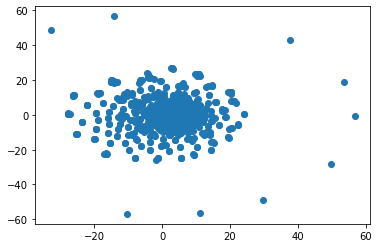

In [169]:
#Then create a scatter plot of the t-SNE output. 

plt.scatter(transformed_features[:,0], transformed_features[:,1])
plt.show()

## Observe whether there are distinct clusters or not.

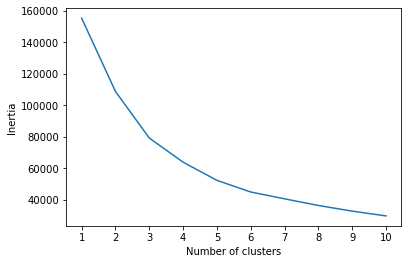

In [170]:

# ### Cluster Analysis with k-Means


# * Create an elbow plot to identify the best number of clusters.
# Use a for-loop to determine the inertia for each `k` between 1 through 

inertia = []
k = list(range(1, 11))


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(transformed_features)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## Determine, if possible, where the elbow of the plot is, and at which value of `k` it appears.
### An elblow at the k value of 3. 

## Based on your findings, make a brief (1-2 sentences) recommendation to your clients. 
## Can the cryptocurrencies be clustered together?
### Yes. 
## If so, into how many clusters? 
### yes it can be clusters into k=3 clusters
